In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

#Wrong data types
    #cut / Done
    #color / Done 
    #clarity / Done
    
#Outliers
    #x / Done
    #y / Done
    #z / Done
    #table / Done

In [4]:
df = pd.read_csv('diamonds.csv')

In [5]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [6]:
df.shape

(53940, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [11]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [26]:
#Wrong data types

df = pd.get_dummies(data=df, columns=['cut', 'clarity', 'color'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  clarity_IF     53940 non-null  uint8  
 12  clarity_SI1    53940 non-null  uint8  
 13  clarity_SI2    53940 non-null  uint8  
 14  clarity_VS1    53940 non-null  uint8  
 15  clarity_VS2    53940 non-null  uint8  
 16  clarity_VVS1   53940 non-null  uint8  
 17  clarity_VVS2   53940 non-null  uint8  
 18  color_

In [48]:
#Remove outliers

df.drop(df.loc[(df['x']==0)|(df['y']==0)|(df['z']<1.7)|(df['y']>30)|(df['z']>30)].index,inplace=True)
df

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
1       0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   
2       0.23   56.9   65.0    327  4.05  4.07  2.31         1          0   
3       0.29   62.4   58.0    334  4.20  4.23  2.63         0          0   
4       0.31   63.3   58.0    335  4.34  4.35  2.75         1          0   
...      ...    ...    ...    ...   ...   ...   ...       ...        ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50         0          1   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61         1          0   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56         0          0   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74         0          0   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64         0          1   

       cut_Premium  ...  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  \
0                0  ...            0            0             0             0   
1                1  ...            0            0             0             0   
2                0  ...            1            0             0             0   
3                1  ...            0            1             0             0   
4                0  ...            0            0             0             0   
...            ...  ...          ...          ...           ...           ...   
53935            0  ...            0            0             0             0   
53936            0  ...            0            0             0             0   
53937            0  ...            0            0             0             0   
53938            1  ...            0            0             0             0   
53939            0  ...            0            0             0             0   

       color_E  color_F  color_G  color_H  color_I  color_J  
0            1        0        0        0        0        0  
1            1        0        0        0        0        0  
2            1        0        0        0        0        0  
3            0        0        0        0        1        0  
4            0        0        0        0        0        1  
...        ...      ...      ...      ...      ...      ...  
53935        0        0        0        0        0        0  
53936        0        0        0        0        0        0  
53937        0        0        0        0        0        0  
53938        0        0        0        1        0        0  
53939        0        0        0        0        0        0  

[53914 rows x 24 columns]

In [53]:
df.drop(df.loc[df['table']>80].index, inplace=True)

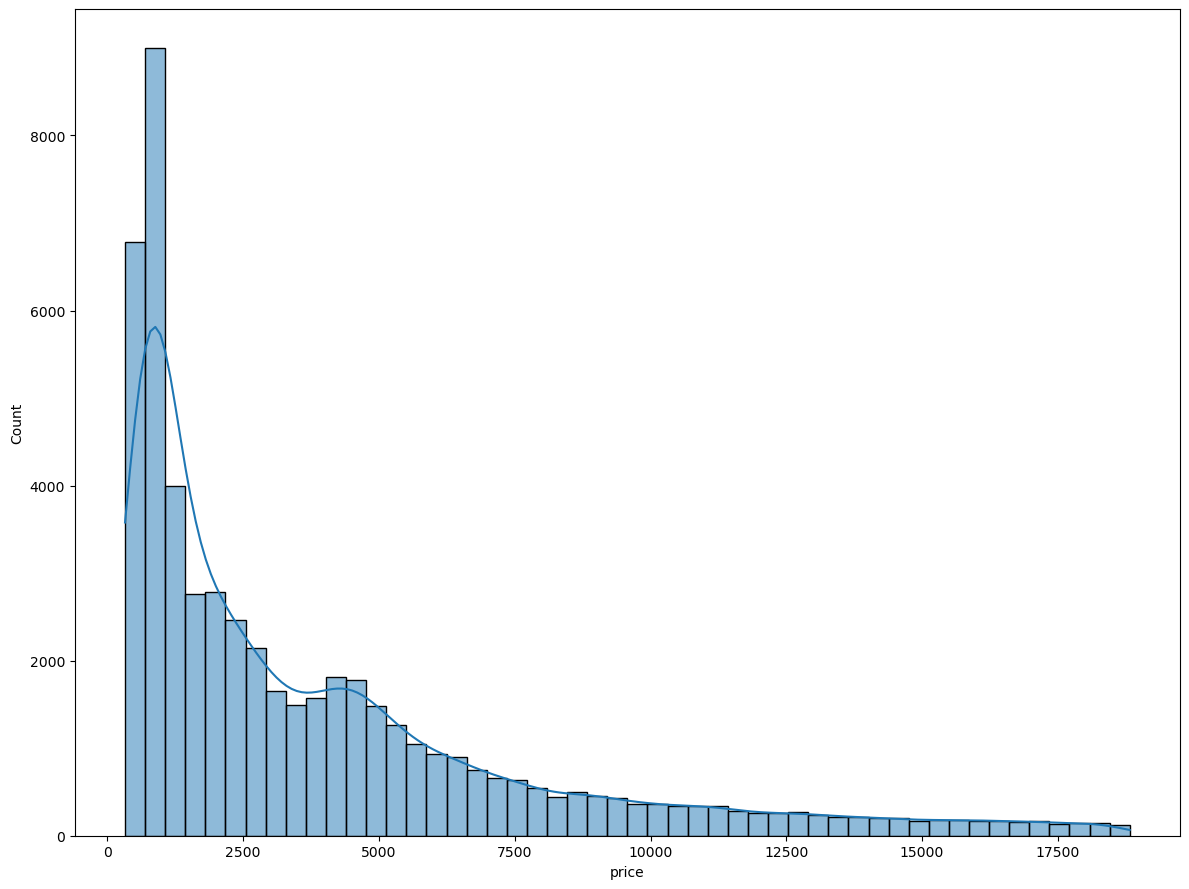

In [55]:
#Data analysis

plt.figure(figsize=(12,9))
sns.histplot(x=df['price'], bins=50, kde=True)
plt.tight_layout()
plt.show()

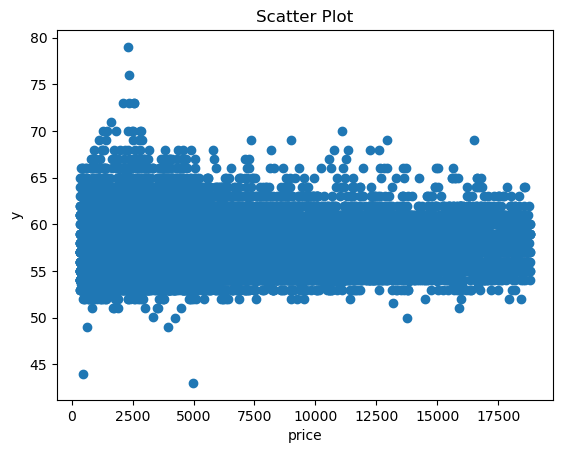

In [56]:
plt.scatter(df['price'], df['table'])
plt.xlabel('price')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

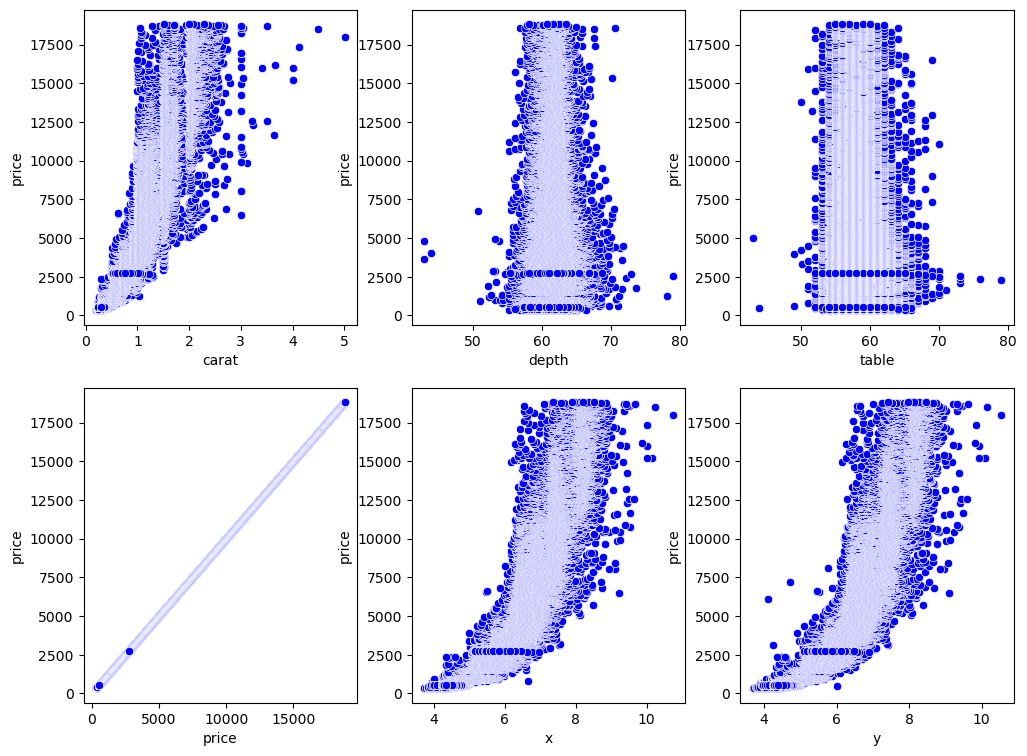

In [59]:
fig, ax = plt.subplots(2,3,figsize=(12,9))
i = 0; j=0

for col in df:
    sns.scatterplot(x=col, y='price', data=df, color='blue', ax=ax[i ,j])
    j+=1
    if(j==3):
        j=0
        i+=1
plt.tight_layout()
plt.show()

In [61]:
df.corr()

carat     depth     table     price         x         y  \
carat          1.000000  0.028489  0.181410  0.921572  0.977775  0.976856   
depth          0.028489  1.000000 -0.295882 -0.010533 -0.024822 -0.027957   
table          0.181410 -0.295882  1.000000  0.126905  0.195977  0.189805   
price          0.921572 -0.010533  0.126905  1.000000  0.887202  0.888799   
x              0.977775 -0.024822  0.195977  0.887202  1.000000  0.998657   
y              0.976856 -0.027957  0.189805  0.888799  0.998657  1.000000   
z              0.976993  0.096766  0.155632  0.882566  0.991620  0.991277   
cut_Good       0.034097  0.135771  0.175633 -0.000325  0.030739  0.033861   
cut_Ideal     -0.163520 -0.022828 -0.550853 -0.097023 -0.163110 -0.157500   
cut_Premium    0.115884 -0.198200  0.339253  0.095326  0.126789  0.109520   
cut_Very Good  0.009932  0.025697  0.120701  0.006919  0.004677  0.018015   
clarity_IF    -0.114423 -0.030929 -0.078938 -0.049532 -0.126335 -0.123990   
clarity_SI1    0.062634  0.040982  0.051649  0.008845  0.078875  0.078461   
clarity_SI2    0.267408  0.007179  0.095578  0.128332  0.272023  0.269283   
clarity_VS1   -0.062929 -0.024074 -0.026853 -0.009711 -0.059916 -0.058614   
clarity_VS2   -0.038830 -0.009575 -0.009207 -0.001038 -0.035439 -0.036022   
clarity_VVS1  -0.167620 -0.023558 -0.069274 -0.095424 -0.185428 -0.183656   
clarity_VVS2  -0.136931 -0.019311 -0.062343 -0.052241 -0.147603 -0.145252   
color_E       -0.138984 -0.028818  0.007485 -0.100872 -0.134640 -0.134394   
color_F       -0.060004 -0.017760 -0.005648 -0.024028 -0.047723 -0.047247   
color_G       -0.029219  0.002831 -0.039026  0.008566 -0.024680 -0.024463   
color_H        0.102034  0.026232  0.011837  0.058709  0.095994  0.094230   
color_I        0.161587  0.022598  0.018232  0.097165  0.146561  0.147058   
color_J        0.180354  0.022512  0.037456  0.081917  0.164990  0.165553   

                      z  cut_Good  cut_Ideal  cut_Premium  ...  clarity_VS1  \
carat          0.976993  0.034097  -0.163520     0.115884  ...    -0.062929   
depth          0.096766  0.135771  -0.022828    -0.198200  ...    -0.024074   
table          0.155632  0.175633  -0.550853     0.339253  ...    -0.026853   
price          0.882566 -0.000325  -0.097023     0.095326  ...    -0.009711   
x              0.991620  0.030739  -0.163110     0.126789  ...    -0.059916   
y              0.991277  0.033861  -0.157500     0.109520  ...    -0.058614   
z              1.000000  0.047099  -0.162096     0.093396  ...    -0.062032   
cut_Good       0.047099  1.000000  -0.258011    -0.185307  ...    -0.017019   
cut_Ideal     -0.162096 -0.258011   1.000000    -0.478026  ...     0.034160   
cut_Premium    0.093396 -0.185307  -0.478026     1.000000  ...    -0.011660   
cut_Very Good  0.014185 -0.169947  -0.438402    -0.314867  ...    -0.006940   
clarity_IF    -0.128074 -0.033040   0.104984    -0.053993  ...    -0.078301   
clarity_SI1    0.082723  0.056097  -0.082982     0.023339  ...    -0.238899   
clarity_SI2    0.270266  0.041694  -0.108081     0.067390  ...    -0.191459   
clarity_VS1   -0.062032 -0.017019   0.034160    -0.011660  ...     1.000000   
clarity_VS2   -0.036780 -0.020965   0.015562     0.022744  ...    -0.229160   
clarity_VVS1  -0.186164 -0.037534   0.088408    -0.053947  ...    -0.113928   
clarity_VVS2  -0.148135 -0.038611   0.075480    -0.061904  ...    -0.136072   
color_E       -0.137594  0.007094  -0.001193    -0.018350  ...    -0.027478   
color_F       -0.049281  0.006754   0.001325    -0.011947  ...    -0.010923   
color_G       -0.023812 -0.024897   0.034706     0.003873  ...     0.055658   
color_H        0.097994 -0.009353  -0.021109     0.027544  ...    -0.012720   
color_I        0.148462  0.006263  -0.009302     0.005906  ...     0.024250   
color_J        0.167389  0.015007  -0.038533     0.017289  ...     0.027156   

               clarity_VS2  clarity_VVS1  clarity_VVS2   color_E   color_F  \
carat            -0.038830     -0.1676

In [77]:
#Train Test 
# X = df.loc[:, ['x', 'y', 'z']]
X = df.loc[:, df.columns != 'price']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

def model_prediction(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_score = r2_score(y_train, y_pred_train)
    test_score = r2_score(y_test, y_pred_test)
    print(train_score)
    print(test_score)

In [79]:
model_prediction(LinearRegression())

0.9218198318851519
0.9168645751869399


In [80]:
model_prediction(DecisionTreeRegressor())

0.9999944949897038
0.9550410367463819


In [81]:
model_prediction(RandomForestRegressor())

0.9966084922029128
0.9765537725026605


In [ ]:
#RandomForestRegressor HAS 97% ACCURACY!!